# Clustering Exercise

## Bibliotheken importieren

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from matplotlib.lines import Line2D

## Daten laden

In [2]:
daten = pd.read_csv("edlich-kmeans-A0.csv") 
print(daten.head())

         V1        V2        V3
0 -5.340236  4.747246  3.823326
1 -9.587065 -3.434466  9.701839
2 -8.385012 -3.902794  8.514620
3  5.708226  2.658575  5.404482
4 -7.431665 -4.390251  9.003216


In [3]:
#daten = daten._get_numeric_data()

## Daten plotten

<AxesSubplot:xlabel='V1', ylabel='V2'>

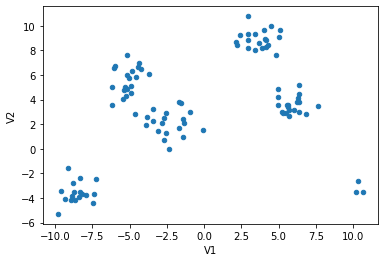

In [4]:
daten.plot.scatter(x="V1", y="V2")

<AxesSubplot:xlabel='V1', ylabel='V3'>

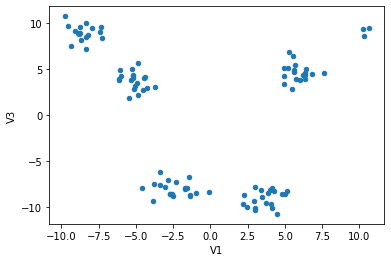

In [5]:
daten.plot.scatter(x="V1", y="V3")

<AxesSubplot:xlabel='V2', ylabel='V3'>

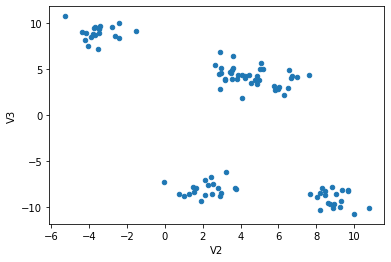

In [6]:
daten.plot.scatter(x="V2", y="V3")

Es ist schwierig diese Daten in 2D zu trennen, deshalb werden sie in 3D angezeigt.

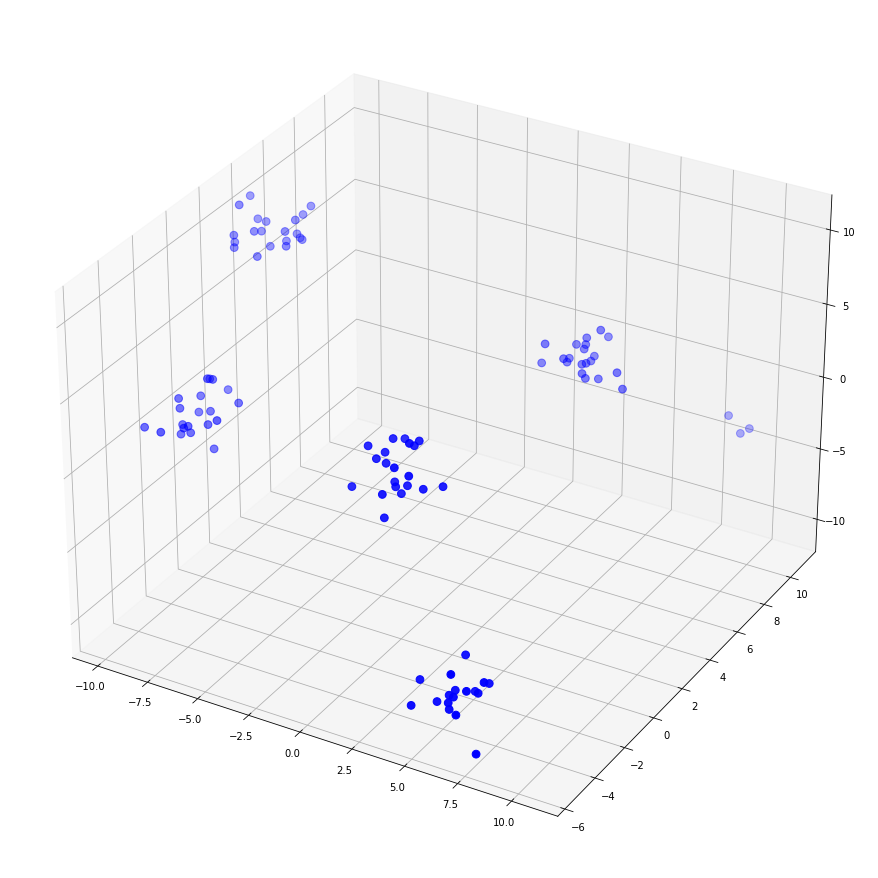

In [7]:
plt.rcParams['figure.figsize'] = (16, 12)
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=['blue', 'g', 'r', 'y'])
daten_val = daten.values
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.scatter(daten_val[:, 0], daten_val[:, 1], daten_val[:, 2], zdir='x', s=60)


In 3D ist es einfacher die Daten zu trennen. Hier unterscheiden wir 6 Gruppen, mit einer Gruppe, die nur 3 Punkte hat.

## => The best k = 6

## Clustering Vector

Die Cluster werden gebildet und eine zusätzliche Spalte mit den Nummern der Cluster wird hinzugefügt

In [8]:
kmeans = KMeans(n_clusters=6)
kmeans = kmeans.fit(daten)
C = kmeans.cluster_centers_
daten['Cluster'] = kmeans.labels_
pd.set_option('display.max_rows', daten.shape[0]+1)
daten

,V1,V2,V3,Cluster
0,-5.340236,4.747246,3.823326,0
1,-9.587065,-3.434466,9.701839,3
2,-8.385012,-3.902794,8.514620,3
3,5.708226,2.658575,5.404482,5
4,-7.431665,-4.390251,9.003216,3
5,5.028509,9.047695,-8.548437,1
6,6.372196,4.459940,4.369358,5
7,-8.355252,-3.516956,7.162714,3
8,-3.405266,2.281427,-7.631172,4
9,5.621561,3.431056,4.666574,5


In [37]:
# Die Farben für die 6 Cluster werden definiert
colors = ['#000000', '#FF0000', '#000080', '#008000', '#81DFD0', '#800080']

# Eine neue Spalte mit den Farben wird hinzugefügt
daten['col'] = daten.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})
print(daten.head())

         V1        V2        V3  Cluster      col
0 -5.340236  4.747246  3.823326        0  #000000
1 -9.587065 -3.434466  9.701839        3  #008000
2 -8.385012 -3.902794  8.514620        3  #008000
3  5.708226  2.658575  5.404482        5  #800080
4 -7.431665 -4.390251  9.003216        3  #008000


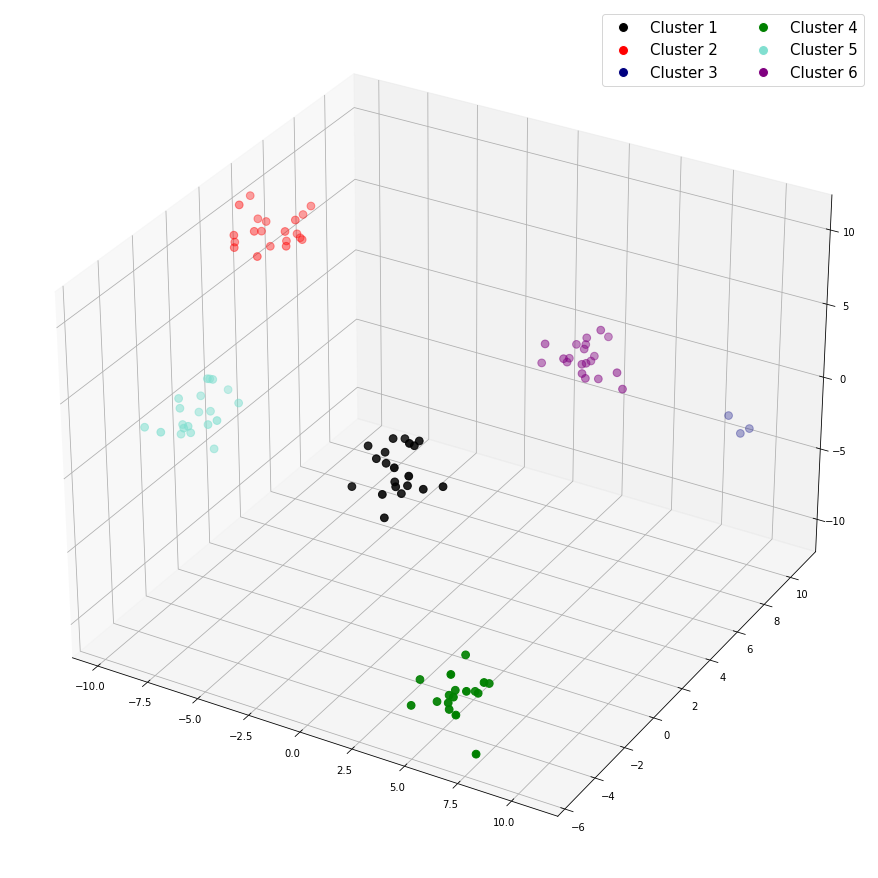

In [36]:


# Die Daten werden noch einmal im 3D angezeigt, aber dieses Mal mit unterschiedlichen Farben pro Cluster
fig2 = plt.figure()
ax2 = Axes3D(fig2, auto_add_to_figure=False)
fig2.add_axes(ax2)
ax2.scatter(daten.values[:, 0], daten.values[:, 1], daten.values[:, 2], zdir='x', s=60, c=daten.col)

# Eine Legende wird erstellt
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
               markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]
# Die Legende wird angezeigt
plt.legend(handles=legend_elements, loc='upper right', ncol=2, fontsize=15)